In [145]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Einführung in die Bewertung von Derivaten
### Matthias Groncki, RC_x
### 13.06.2016



## Was ist ein Derivat

Wiki: Ein Derivat ist ein gegenseitiger Vertrag, der seinen wirtschaftlichen Wert vom beizulegenden Zeitwert einer marktbezogenen Referenzgröße ableitet

## Beispiele für Derivate

* **Put / Call auf ein Underlying wie z.B Aktien oder Fremdwährungen**

Eine europäische Call-Option gibt dem Optionshalter das Recht zum Zeitpunkt $T$ (OptionExpiry) das Underlying zu einem festgelegten Kurs $K$ (Strike) zu kaufen.

Ist der Kurs des Underlyings $S_T>K$ wird der Halter der Option die Option ausüben und erhält entweder 

* das Underlying zum vereinbarten Kaufpreis (physical delivery) oder 
* erhält die Differenz aus $S_T - K$ (cash settled). 

Ist der Kurs des Underlying niedriger, wird der Halter die Option verfallen lassen. 

Der Wert der Option am Ende der Laufzeit ist mit $V(T) = \max(0.0, S_T-K)$ gegeben.


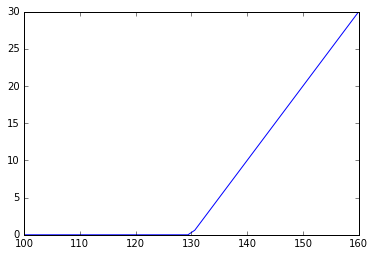

In [146]:
K = 130
S_T = np.linspace(100, 160, 50)
plt.plot(S_T, np.fmax(S_T-K, 0) )

### Weitere Optionen sind:

* **Zinsderivate**:
    * Caps / Floors : Call / Put auf einen Referenzzinssatz
    * Swaps (Libor, CMS, CMS Spread): Tauscht zukünftige variable Zinszahlungen gegen einen fixen Zinssatz oder anderen variablen Zins
    * Swaptions : Call / Put auf einen Swap
    * Forwards
* **FX Derivate**:
    * Call / Put
    * Barrier
    * Forward
    * TG Chance
* **Credit Derivate**:
    * Credit Default Swap
* **Inflation Derivate**:
    * Inflation Cap/Floor
    * Inflation Swaps

**Derivate sind auch in anderen Produkten eingebettet und müssten eigentlich auch als Derivate bewertet werden.**

* BGB Kündigungsrechte bei Kredite
* Implizite Floors bei Bonds und Kredite
* Equitykicker bei MezzFund

## Wie kann man ein Derivat bewerten

* Wir benötigen ein Modell zur Bewertung

Allgemeine Modellannahmen:

* ?
* ?

Spezielle Modellannahmen:

* Modell für die Preisverteilung (den stochastischen Prozess) des Underlying

### Was ist ist ein stochastischer Prozess?

Wikipedia beschreibt einen stochastischen Prozess als

die mathematische Beschreibung von zeitlich geordneten, zufälligen Vorgängen.



**"Defintion":**

Sei $(\Omega, P, F)$ ein Wahrscheinlichkeitsraum, $T$ eine Indexmenge (üblicherweise T=N oder T=R). 
Eine Folge von von Zufallsvariablen $X_t$ mit $t \in T$ mit $X_t : \Omega \to R$ einen stochastischen Prozess.


**Beispiele**

- Aktienkurse, Zinsen, Fx-Kurse 

- Warteschlange an der Supermarktkasse

- ...

Eine Realisierung / Beobachtung eines Stochastischen Prozess nennt man auch **Pfad**.

## Beispiel: Binominalmodell

* Es gibt zwei Perioden


* Es gibt eine risikolose Anlage (Bankkonto) mit einer verzinsung von r = 2%.


* Der heutige Aktienkurs $S_0$ beträgt 100


* Mit der Wahrscheinlichkeit von p=20% verdoppelt sich der Kurs 200 und mit einer Wahrscheinlichkeit von 80% halbiert sich der Kurs 


* Wir wollen einen Call mit Expiry in der zweiten Periode und Strike 150 bewerten

### Der allwissende Investor 

* Kennt die tatsächliche Verteilung des Underlyings

* Was ist der Wert der Option für den allwissenden Investor?




*Erwartete Auszahlung: * 

$E[V(S_1)] = 0.2 \times V(200) + 0.8 \times V(50) = 0.2 \times (200-150) + 0.8 \times 0 = 10$





Probleme:

- Wer kennt schon die tatsächliche Verteilung (wie kann diese geschätzt werden)
- Jeder Marktteilnehmer hat eine anderen Meinung

Pricing über ein Replikationsportfolio

Wir stellen ein Portfolio aus $\Delta x$ Stück des Underlying und einer Geldanlage oder Kreditaufnahme zum risikolosen Zins $r$ in Höhe von $B$ zusammen, so dass wir die Auszahlung des Derivates in jedem Zustand replizieren:



Replikationsbedingung:

(1) $\Delta u S_0 + B (1+r) = V(uS_0) $

(2) $\Delta d S_0 + B (1+r) = V(dS_0) $


$\Rightarrow \Delta = \frac{V(uS_0) - V(dS_0)}{(u-d)S_0}$

$\Rightarrow B = \frac{V(dS_0) - \Delta d S_0}{1+r}$


Preis des Calls ergibt sich aus den Preis des Replikationsportfolio zum Start:

$V(0) = \Delta S_0 + B$

In [147]:
def V(S_T, K):
    return max(S_T-K, 0)

S_0 = 100
K = 150
r = 0.02
p = 0.2
q = 1-p

u = 2
d = 0.5

S_u = u*S_0
S_d = d*S_0

delta = (V(S_u, K) - V(S_d, K)) / (S_0*(u-d))


B = (V(S_d,K) - delta*S_d) / (1+r)

print("Anzahl Underlying: ", delta)
print("Nominal im Bankaccount", B)

Anzahl Underlying:  0.3333333333333333
Nominal im Bankaccount -16.33986928104575


### Test des Portfolios

In [148]:
print("Wert des Portfolios im Falle des fallenden Kurs", delta*S_d + B*(1+r))

Wert des Portfolios im Falle des fallenden Kurs 0.0


In [149]:
print("Wert des Portfolios im Falle des steigenden Kurs", delta*S_u + B*(1+r))

Wert des Portfolios im Falle des steigenden Kurs 49.99999999999999


#### Wert des Portfolios zum heutigen Zeitpunkt

In [150]:
V0 = delta*S_0 + B
V0

16.993464052287578

**Arbitrage:**
    
    - Kaufe n Optionen vom allwissenden Investor für 10 EUR
    - Verkaufe das Replikationsporfolio
    - Risikolosergewinn von ca. 7 EUR pro Option 
    
    
Das würde ja jeder machen also kann der Erwartungswert nicht der faire Preis für die Option sein.

Faire Preis ist über das Replikationsportfolio bestimmt. 

Generellen Annahmen für die Bewertung:

- Vollständiger Markt (Existenz eines Replikationsportfolios)
- Keine Arbitrage

## Risikoneutrale Wahrscheinlichkeiten

Bei der Bewertung spielen die tatsächlichen Eintrittswahrscheinlichkeiten keine Rolle.

Wir verändern die Wahrscheinlichkeiten so, dass das abdiskontierte Hedgeinstrument ein Martingal ist.


$S_0 = \frac{1}{1+r} E[S_T]$

$S_0 = \frac{1}{1+r} (p uS_0 + (1-p)dS_0)$


Beide abdiskontierte Hedgeinstrumente sind Martingale, so ist auch das Hedgeportfolio (als lineare Kombination aus beiden) ein Martingal.

Also gilt:
    

$V(0) = \frac{1}{1+r} E^{rl}[V(S_T)]$


In [151]:
# Berechnung in unseren Beispiel

p_rl = ((1+r) - d) / (u-d)

print("Risikoneutrale Wahrscheinlichkeit: ", p_rl)

V_0 = 1 / (1+r) * p_rl * V(S_u, K) + (1-p_rl) * V(S_d, K)

print("Call NPV", V_0)

Risikoneutrale Wahrscheinlichkeit:  0.3466666666666667
Call NPV 16.99346405228758


## Zusammenfassung I


- Bewertung von Derivate über Replikationsportfolien & Abitrageargumente


- Wert des Derivates unabhängig von den Eintrittswahrscheinlichkeiten


- Konstruktion eines "alternativen" Wahrscheinlichkeitsmaß erleichtert die Bewertung


- Risikoneutrale Wahrscheinlichkeitsmaß stimmt mit dem "physikalischen" Maß nur über die Menge der möglichen Ausgängen überein


- Wählt man den "falschen" stochastischen Prozess, hält das Hedgeportfolio nicht

## Zeitstetige Modelle & stochastische DGL


** Grobskizze **

- (Vollständiger Markt) Es existiert Replikationsportfolio aus handelbaren Assets 


- (Arbitragefreier Markt) Preis des Replikationsportfolio muss Preis des Derivates entsprechen


=> Es existiert ein risikoneutrales Maß unter dem alle diskontierte handelbare Assets Martingale sind


Der Preis des Derivates ist dann:

$P(0,0) V(0) = E^P[P(0,T) V(T, S_T) | F_0]$


**Wie können wir den Erwartungswert berechnen?**

Wir müssen dazu die Verteilung von V(T, S_T) kennnen. Die Verteilung ist abhängig vom unterliegenden Prozess.

### Wiener Prozess

Ein besondere stochastischer Prozess ist der Wiener Prozess. Er hat folgende Eigenschaften:

- $W(0) = 0$



- $W(t_2) - W(t_1) \sim N(0,t_2-t_1)$



- Differenzen sind i.i.d

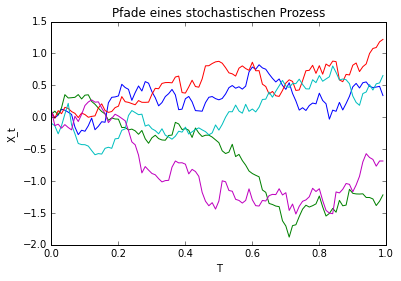

In [152]:
dt = 1./100.
T = np.arange(0, 1, dt)
for i in range(0,5):
    X = np.cumsum(np.sqrt(dt) * np.random.randn(T.shape[0]))
    plt.plot(T,X)
plt.xlabel("T")
plt.ylabel("X_t")
plt.title("Pfade eines stochastischen Prozess")

## Stochastische DGL

Mit einer stochastischen Differentialgleichung wird die *Dynamik* des Prozesses beschrieben. Üblicherweise hat eine SDGL die Form

$ dS_t = \mu(t, S_t) dt + \sigma(t, S_t) dW_t$

mit dem Wiener prozess $W_t$. 



Die Änderung des Prozesses von $t$ nach $t+\delta t$ für sehr kleine (unendlich kleine) $\delta t$ wird mit dieser Formel beschrieben. Es besteht aus einem deterministischen Teil $\mu(t, S_t)dt$ und einem stochastishen Teil beschrieben $\sigma(t, S_t) dW$. 



## Black Scholes Modell


Ein sehr bekanntes Modell ist das Black-Scholes Model mit der SDGL:

$ dS_t = \mu S_t dt + \sigma S_t dW$





Für dieses Modell gibt es eine Lösung für die Gleichung

$S(t) = S_0\exp((\mu-\frac{\sigma^2}{2})t+\sigma W_t)$

In diesem Model sind die relativen Veränderung von S_0 nach S_t lognormal verteilt.

$\log(\frac{S_t}{S_0}) = (\mu-\frac{\sigma^2}{2})t+\sigma W_t$




### Maßwechsel in die risikoneutrale Welt

$ dS_t = r S_t dt + \sigma S_t dW$

$E[S_t] = S_0\exp(rt) $

- Abdiskontierte Preis des Underlyings ist ein Martingal

In diesem Modell gibt es sogar geschlossene Formen für die Preise von einer Calloption:

$V(0) = S_0\Phi(d1) - K \exp(-rT) \Phi (d2) $

mit $d1=\frac{\log{\frac{S_0}{K}}+(r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$, $d2=d1-\sigma\sqrt{T}$ und $\Phi$ die Verteilungsfunktion der Standardnormalverteilung.


**Was kann man machen wenn es keine geschlossene Formel gibt?**

## Monte Carlo Methoden

Wie lassen sich Erwartungswerte schätzen?

**Mittelwert** 

Sei $X_i$ unabhängig und identisch verteilte Zufallsvariablen mit $E[X_i] = \mu$. Dann ist 

$\hat{\mu} = \frac{1}{n} \sum_i^n X_i $

ein erwartungstreuer und konsistenter Schätzer.


####Beispiel 1:Berechnung von $\pi$ mit MC

- Dartwurf auf ein Quadrat 2 x 2

- In dem Quadrat ist der Einheits-Kreis gezeichnet

- $X_i = 1$, fall der Dart innerhalb des Kreises landet und sonst Null.

- Wir nehmen dass wir nicht "zielen" und somit jeder Punkte auf der Fläche mit der gleichen Wahrscheinlichkeit getroffen werden. Die Würfe sind unabhängig und die Wahrscheinlichkeit das ein Dart im Kreis landet liegt bei $\frac{1}{4}\pi$. 




In [153]:
def MCSimulation1(N):
    x = np.linspace(-1,1)
    y = np.sqrt(1-x**2)
    plt.plot(x,y, color='b')
    plt.plot(x,-y, color='b')
    dart = np.random.uniform(-1,1, size=(2,N))
    getroffen = np.sum(dart**2, axis=0)<=1
    plt.scatter(dart[0,~getroffen], dart[1,~getroffen], color='r')
    plt.scatter(dart[0,getroffen], dart[1,getroffen], color='b')
    plt.title("Dartwurf N=%i"%N)
    plt.show()
    print("Pi = %f" % (4.*float(np.sum(getroffen))/float(N)) )

np.random.seed(1)


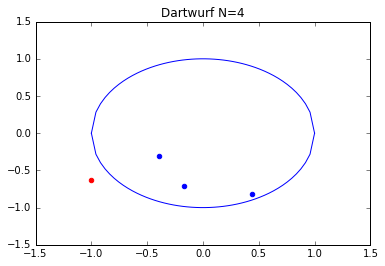

Pi = 3.000000


In [154]:
MCSimulation1(4)


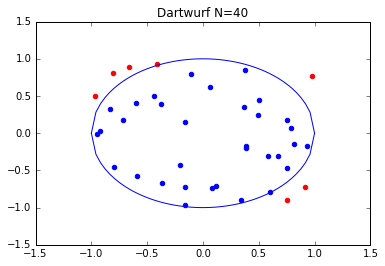

Pi = 3.300000


In [155]:
MCSimulation1(40)


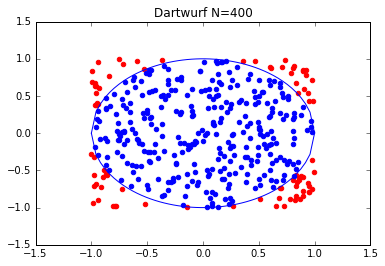

Pi = 3.150000


In [156]:
MCSimulation1(400)


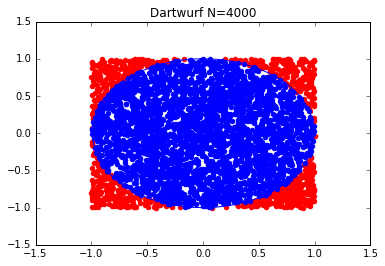

Pi = 3.147000


In [157]:
MCSimulation1(4000)

###Beispiel 2. Calloption mit Monte Carlo Simulation

- r = 0.03 
- $\sigma= 0.2$
- T = 1
- K = 103
- S_0 = 100

In [158]:
np.random.seed(1)

In [159]:
import scipy.stats as ss

#Black and Scholes
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
 
def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
 
def BlackScholesCall(S0, K, r, sigma, T):
    return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))

In [160]:
def payOff(S_T, K, T, r):
    return np.fmax(S_T-K, 0.0)*np.exp(-r*T)

In [161]:
def pathGeneration(N, S_0, sigma, r, T, dt):
    t = np.arange(0, T+dt, dt)
    dW = np.sqrt(dt) * np.random.randn(N, len(t)-1)
    S = np.zeros((N, len(t)))
    S[:, 0] = S_0
    S[:,1:] = S_0*np.cumprod(np.exp((r-sigma**2/2)*dt+sigma*dW), axis=1)
    return t, S

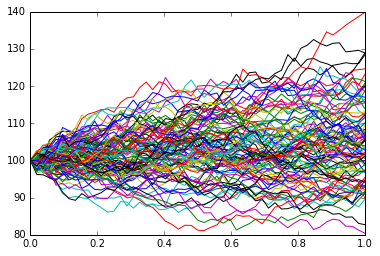

In [162]:
t, S1 = pathGeneration(100, 100, 0.1, 0.03, 1, 1/52.)

for i in range(0, 100):
    plt.plot(t, S1[i,:])

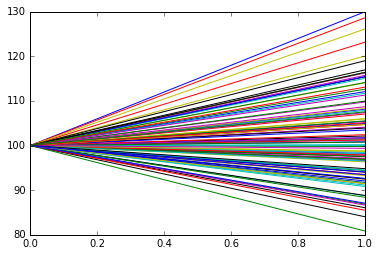

In [163]:
N = 10000
t, S = pathGeneration(N, 100, 0.1, 0.03, 1, 1)

for i in range(0, 100):
    plt.plot(t, S[i,:])

###Güte der Simulation in Abhängigkeit der Sitchprobe

/Users/matthiasgroncki/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/matthiasgroncki/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


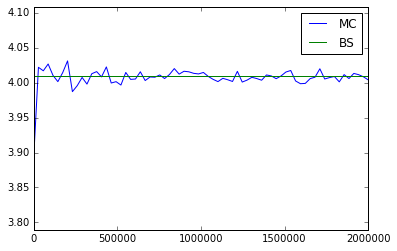

In [164]:
N = np.linspace(100,2e6, 70)
V_MC = np.zeros(N.shape)
V_BS = np.zeros(N.shape)
V_BS[:] = BlackScholesCall(100, 103, 0.03, 0.1, 1)
for i in range(N.shape[0]):
    t, S = pathGeneration(N[i], 100, 0.1, 0.03, 1, 1)
    V_MC[i] = np.mean(payOff(S[:,-1], 103, 1, 0.03))
    
plt.plot(N,V_MC)
plt.plot(N,V_BS)
plt.ylim(np.min(V_MC)-0.1, np.max(V_BS)+0.1)
plt.legend(["MC", "BS"])

In [165]:
N = np.array([10**i for i in range(1,8)])
V_MC = np.zeros((7,20))

for i in range(N.shape[0]):
    for j in range(0, 20):
        t, S = pathGeneration(N[i], 100, 0.1, 0.03, 1, 1)
        V_MC[i, j] = np.mean(payOff(S[:,-1], 103, 1, 0.03))

In [166]:
import pandas as pd
pd.DataFrame(V_MC, index=N).T

,10,100,1000,10000,100000,1000000,10000000
0,7.002519,4.920343,3.760139,3.981517,4.024967,3.997949,4.010126
1,6.995833,3.949006,3.919908,4.004953,3.993682,4.013823,4.008804
2,6.970454,4.173934,4.147529,4.010374,3.968703,4.006621,4.009861
3,0.437431,3.266483,3.711490,3.971027,4.010516,4.011429,4.011645
4,4.377311,3.298525,3.722210,4.075284,3.999880,4.001456,4.009976
5,1.486307,3.734809,3.958199,4.089549,3.982037,4.006475,4.005380
6,2.165392,4.272690,4.009487,3.951646,4.024424,4.011966,4.009139
7,1.308562,4.370478,4.006764,3.927404,3.992059,4.007220,4.005435
8,6.029680,3.742611,4.408471,4.081101,4.010679,4.009382,4.009448
9,3.598355,3.492616,4.096478,4.071650,3.977139,3.995654,4.008295



### Varianz in Abhängigkeit der Sitchprobe

In [168]:
pd.DataFrame(V_MC, index=N).T.var()

10          4.730080
100         0.328129
1000        0.025969
10000       0.003326
100000      0.000432
1000000     0.000035
10000000    0.000003
dtype: float64

## Verwendete Modelle in der IKB

- Black Scholes / Bachelier für Cap/Floors (Ibor und Inflation)
- Linear TSR (CMS Swaps, Caps/Floors)
- Hull White model (kündbare Swaps, Bonds)
- Sabr (Swaptions)

### Beispiele für Modell Short Comings

- Black Scholes nur positive Zinsen (Wahrscheinlichkeit Zinsen < 0 = 0) (Black Model ungeeignet für Cap/Floors)


- Black Scholes oder Bachelier können nicht alle Marktpreise reproduzieren (konstante Vol vs. Smile)


- Interpolationen der Vols sind nicht immer Arbitrage-frei


### Modellrisiken

- Welches Modell

- Parametrisierung

- Was sind Marktstandards

- Wie gut sind meine Sensis

- Stabilität